<p align="center">
Universidade Federal de Alagoas</br>

Instituto de Computação</br>

</p>

# Trabalho Prático AB2

Disciplina: Sistemas Distribuídos

Semestre letivo: 2019.1

Professor: André Lage Freitas

Aluno: Igor da Cunha Araújo Theotônio

## Especificação

**Importante**. Leia atentamente essa seção pois só serão aceitos trabalhos que obedecerem as a especificações a seguir. 

Baseado(a) no exemplo a seguir de implementação do B-multicast em Julia, façam os exercícios descritos nesse documento.

In [1]:
# function B_multicast(g, m, B_deliver)
#     for p in g
#         remotecall(B_deliver, p, m)
#     end
# end

# # Adding 3 processes (workers)
# addprocs(3)

# # My group is composed by all workers
# g = workers()

# # Multicasting "oi!" message to group `g` by assuming `println` as B_deliver function.
# B_multicast(g, "oi!", println)

### Suporte de programação distribuída em Julia

Para utilizar o suporte de programação distribuída em Julia, primeiro devemos carergar a biblioteca `Distributed`:

```julia
using Pkg
Pkg.add("Distributed")
using Distributed
```

A seguir, segue uma lista (não extensiva) de funções que poderão ajudar na programação distribuída para a implementação do trabalho:

```julia
addprocs
remotecall
@fetchfrom
@everywhere
sleep
@spawn
```

Para buscar uma rápida ajuda sobre as funções, utilize `?` na frente da função (ver exemplo abaixo). 

```julia
?addprocs
```

Utilize o [material do mini-curso do Professor](https://github.com/proflage/2018-julia-hands-on) para estudo e a [documentação oficial da linguagem Julia (1.x)](https://docs.julialang.org/en/v1/) para demais dúvidas.

## Exercício 1: Sincronismo (2,0 pontos)

Adicione 10 processos com o comando `addprocs` abaixo. 

_Atenção_: caso sua instalação local de Julia pode não conseguir adicionar 10 processos, use a [JuliaBox](https://juliabox.com).

In [2]:
# Installing required packages
using Pkg
Pkg.add("Distributed");
Pkg.add("StatsPlots");
Pkg.add("Statistics");

 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]


In [3]:
# Adding required packages
using Distributed
using Statistics
using StatsPlots

In [4]:
# Adds 10 workers, it goes from 2 to 11 because 1 is the master
addprocs(10);

Modifique a implementação do B-multicast para utilizar comunicação síncrona.

In [5]:
#= 
    Synchronous B_multicast implementation, makes a remote
    call for B_deliver function for each process (worker)
    it waits the end of the execution to make the next 
    call 
=#
function B_multicast_sync(group, message, B_deliver)
    for process in group
        remotecall_wait(B_deliver, process, message)
    end
end

#= 
    Asynchronous B_multicast implementation, makes a remote
    call for B_deliver function for each process (worker)
    it does not wait end of the execution to make the next 
    call 
=#
function B_multicast_async(group, message, B_deliver)
    for process in group
        remotecall(B_deliver, process, message)
    end
end

group = workers();
message = "Hello";

Execute as duas versões do B-multicast (síncrona e assíncrona) e compare as saídas.

In [6]:
B_multicast_sync(group, message, println)

      From worker 2:	Hello
      From worker 3:	Hello
      From worker 4:	Hello
      From worker 5:	Hello
      From worker 6:	Hello
      From worker 7:	Hello
      From worker 8:	Hello
      From worker 9:	Hello
      From worker 10:	Hello
      From worker 11:	Hello


In [17]:
B_multicast_async(group, message, println)

      From worker 2:	Hello!
      From worker 6:	Hello!
      From worker 9:	Hello!
      From worker 7:	Hello!
      From worker 3:	Hello!
      From worker 4:	Hello!
      From worker 5:	Hello!
      From worker 8:	Hello!
      From worker 10:	Hello!
      From worker 11:	Hello!


A ordem das mensagens das saídas foram as mesmas para ambas versões do B-multicast? Por quê?

**Resposta**: _Não. O B-multicast síncrono garante que as mensagens de saída estejam sempre ordenadas, visto que há a espera do fim da execução de um processo para que outro seja iniciado, garantindo assim uma sequência. Por outro lado, o B-multicast assíncrono não tem ordem definida, visto que os processos são executados de forma paralela e sem necessidade de espera do fim de um para execução do outro._

### Exercício 2: Análise de desempenho do B-multicast (2,0 pontos)

Meça o tempo de execução duas versões do B-multicast (síncrona e assíncrona). Dica: utilize a macro `@time`.

* Execute 50 vezes essa medição e construa um gráfico em forma de barras:
	* cada barra representando cada versão do B-multicast;
	* calcule e coloque no gráfico o [intervalo de confiança](https://en.wikipedia.org/wiki/Confidence_interval) com nível de 95%.

In [35]:
#= 
    Initialize the number of iterations for the next task, 
    z* for the 95% confidence interval and two arrays that 
    will hold the execution time for each iteration in both 
    versions of B-multicast
=#
iter, z = 50, 1.96
sync_b_times = []
async_b_times = []

#= 
    Executes synchronous b-multicast iter times and stores
    the execution time for each interation in sync_b_times
=#
for i in 1:iter
    println("B-Synchronous: iteration $i")
    val, time, bytes, gctime, memallocs = @timed B_multicast_sync(group, message, println);
    push!(sync_b_times, time)
end

#= 
    Executes asynchronous b-multicast iter times and stores
    the execution time for each interation in async_b_times
=#
for i in 1:iter
    println("B-Asynchronous: iteration $i")
    val, time, bytes, gctime, memallocs = @timed B_multicast_async(group, message, println);
    push!(async_b_times, time)
end

B-Synchronous: iteration 1
      From worker 2:	Hello!
      From worker 3:	Hello!
      From worker 4:	Hello!
      From worker 5:	Hello!
      From worker 6:	Hello!
      From worker 7:	Hello!
      From worker 8:	Hello!
      From worker 9:	Hello!
      From worker 10:	Hello!
      From worker 11:	Hello!
B-Synchronous: iteration 2
      From worker 2:	Hello!
      From worker 3:	Hello!
      From worker 4:	Hello!
      From worker 5:	Hello!
      From worker 6:	Hello!
      From worker 7:	Hello!
      From worker 8:	Hello!
      From worker 9:	Hello!
      From worker 10:	Hello!
      From worker 11:	Hello!
B-Synchronous: iteration 3
      From worker 2:	Hello!
      From worker 3:	Hello!
      From worker 4:	Hello!
      From worker 5:	Hello!
      From worker 6:	Hello!
      From worker 7:	Hello!
      From worker 8:	Hello!
      From worker 9:	Hello!
      From worker 10:	Hello!
      From worker 11:	Hello!
B-Synchronous: iteration 4
      From worker 2:	Hello!
      From worker 

      From worker 2:	Hello!
      From worker 3:	Hello!
      From worker 4:	Hello!
      From worker 5:	Hello!
      From worker 6:	Hello!
      From worker 7:	Hello!
      From worker 8:	Hello!
      From worker 9:	Hello!
      From worker 10:	Hello!
      From worker 11:	Hello!
B-Synchronous: iteration 35
      From worker 2:	Hello!
      From worker 3:	Hello!
      From worker 4:	Hello!
      From worker 5:	Hello!
      From worker 6:	Hello!
      From worker 7:	Hello!
      From worker 8:	Hello!
      From worker 9:	Hello!
      From worker 10:	Hello!
      From worker 11:	Hello!
B-Synchronous: iteration 36
      From worker 2:	Hello!
      From worker 3:	Hello!
      From worker 4:	Hello!
      From worker 5:	Hello!
      From worker 6:	Hello!
      From worker 7:	Hello!
      From worker 8:	Hello!
      From worker 9:	Hello!
      From worker 10:	Hello!
      From worker 11:	Hello!
B-Synchronous: iteration 37
      From worker 2:	Hello!
      From worker 3:	Hello!
      From wor

      From worker 4:	Hello!
      From worker 7:	Hello!
      From worker 11:	Hello!
      From worker 2:	Hello!
      From worker 5:	Hello!
      From worker 8:	Hello!
B-Asynchronous: iteration 18
      From worker 7:	Hello!
      From worker 11:	Hello!
      From worker 5:	Hello!
      From worker 7:	Hello!
      From worker 2:	Hello!
      From worker 3:	Hello!
      From worker 4:	Hello!
      From worker 6:	Hello!
      From worker 8:	Hello!
B-Asynchronous: iteration 19
      From worker 9:	Hello!
      From worker 10:	Hello!
      From worker 3:	Hello!
      From worker 5:	Hello!
      From worker 10:	Hello!
      From worker 4:	Hello!
      From worker 11:	Hello!
      From worker 2:	Hello!
      From worker 6:	Hello!
      From worker 7:	Hello!
B-Asynchronous: iteration 20
      From worker 8:	Hello!
      From worker 9:	Hello!
      From worker 4:	Hello!
      From worker 7:	Hello!
      From worker 10:	Hello!
      From worker 8:	Hello!
      From worker 3:	Hello!
      From 

      From worker 8:	Hello!
      From worker 10:	Hello!
      From worker 11:	Hello!
      From worker 3:	Hello!
      From worker 5:	Hello!
      From worker 6:	Hello!
      From worker 9:	Hello!
      From worker 7:	Hello!
      From worker 8:	Hello!
      From worker 10:	Hello!
      From worker 11:	Hello!


**Gráfico**:

Synchronous ---- mean time: 0.0028274441600000004 && standard deviation: 0.0027877852406301383
Synchronous ---- iterations times: Any[0.00341779, 0.0214196, 0.00286739, 0.0025446, 0.0021265, 0.00256869, 0.00289219, 0.0022078, 0.00221859, 0.00303829, 0.00264329, 0.0023192, 0.00228269, 0.00233169, 0.0022169, 0.0023124, 0.00222019, 0.0022913, 0.0022018, 0.00222289, 0.0022962, 0.0022837, 0.0021318, 0.00257569, 0.0023138, 0.00244049, 0.0020556, 0.0021075, 0.0020069, 0.0022568, 0.00208289, 0.00254669, 0.00240479, 0.0026502, 0.0022812, 0.0021314, 0.00733229, 0.00236119, 0.00208019, 0.0023, 0.00226619, 0.00222229, 0.0022898, 0.00222419, 0.0025793, 0.00210599, 0.0025657, 0.0021732, 0.0019584, 0.0020041]

Asynchronous ---- mean time: 0.0005250149199999999 && standard deviation: 7.601971400244726e-5
Asynchronous ---- iterations times: Any[0.000715398, 0.000611599, 0.000609698, 0.000524099, 0.000619098, 0.000578199, 0.000596599, 0.000638899, 0.000576299, 0.000572299, 0.000550899, 0.000583798, 0.00

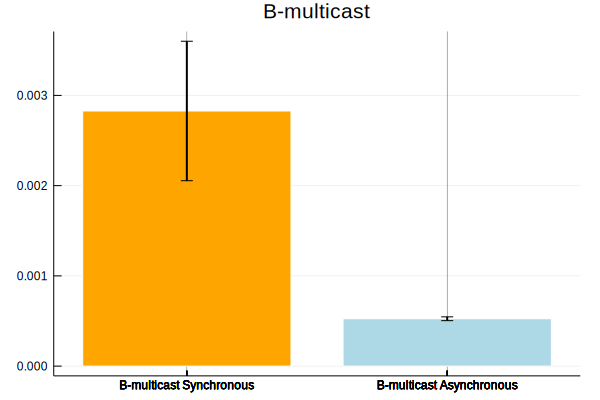

In [36]:
#= 
    Calculate mean and error bar values (for the 
    confidence interval) using fuctions of statistics 
    package
=#
sync_b_mean = mean(sync_b_times)
async_b_mean = mean(async_b_times)
sync_b_err = z*(std(sync_b_times)/sqrt(length(sync_b_times)))
async_b_err = z*std(async_b_times)/sqrt(length(async_b_times))

println("Synchronous ---- mean time: $sync_b_mean && standard deviation: $(std(sync_b_times))")
println("Synchronous ---- iterations times: $sync_b_times\n")
println("Asynchronous ---- mean time: $async_b_mean && standard deviation: $(std(async_b_times))")
println("Asynchronous ---- iterations times: $async_b_times")

#= 
    Builds the bar chart with error bar for 
    b-multicast versions comparision
=#
bar(["B-multicast Synchronous", "B-multicast Asynchronous"], 
    [sync_b_mean, async_b_mean], yerr = [sync_b_err, async_b_err], 
    title = "B-multicast", legend = false, 
    linecolor = "white", markerstrokewidth = 2, 
    markerstrokecolor = "black", color = ["orange", "lightblue"])

* Qual das duas versões teve o menor tempo de execução? Por quê?

**Resposta**: _A versão assíncrona. Tendo em vista que nela os processos são executados em paralelo e sem a necessidade de esperar o fim de um processo para iniciar outro, é o resultado esperado. Enquanto isso, a versão síncrona é mais lenta exatamente pela execução ser sequêncial e não paralela._

### Exercício 3: Análise de desempenho do R-multicast (3,0 pontos)

Implemente duas versões do algoritmo R-multicast: uma assíncrona e outra síncrona.

* R-multicast síncrono

In [37]:
#= 
    Initializes the array that will hold messages already 
    received its accessible from every process environment
=#
@everywhere received = Any[]

#= 
    Synchronous R_multicast implementation, it executes B_multicast_sync_check
    function from every process environment in a synchronous way, that is, it
    waits for an execution to end to start the next one
=#
@everywhere function R_multicast_sync(group, message, R_deliver)
    for process in group
        @sync @spawnat process B_multicast_sync_rcv_check(process, group, message, R_deliver)
    end
end

#= 
    This function is responsible for making sure that all messages will be sent
    and that those already received will be accounted and tell the other workers
=#
@everywhere function B_multicast_sync_rcv_check(process, group, message, R_deliver)
    if message in received
        remotecall_wait(R_deliver, process, message)
    else
        push!(received, message)
        R_multicast_sync(group, message, R_deliver)
    end
end

message = "Hello!";
R_multicast_sync(group, message, println);

      From worker 2:	Hello!
      From worker 2:	Hello!
      From worker 3:	Hello!
      From worker 2:	Hello!
      From worker 3:	Hello!
      From worker 4:	Hello!
      From worker 2:	Hello!
      From worker 3:	Hello!
      From worker 4:	Hello!
      From worker 5:	Hello!
      From worker 2:	Hello!
      From worker 3:	Hello!
      From worker 4:	Hello!
      From worker 5:	Hello!
      From worker 6:	Hello!
      From worker 2:	Hello!
      From worker 3:	Hello!
      From worker 4:	Hello!
      From worker 5:	Hello!
      From worker 6:	Hello!
      From worker 7:	Hello!
      From worker 2:	Hello!
      From worker 3:	Hello!
      From worker 4:	Hello!
      From worker 5:	Hello!
      From worker 6:	Hello!
      From worker 7:	Hello!
      From worker 8:	Hello!
      From worker 2:	Hello!
      From worker 3:	Hello!
      From worker 4:	Hello!
      From worker 5:	Hello!
      From worker 6:	Hello!
      From worker 7:	Hello!
      From worker 8:	Hello!
      From worker 9:

* R-multicast assíncrono

In [38]:
#= 
    Initializes the array that will hold messages already received
    its accessible from every process environment
=#
@everywhere received = Any[]

#= 
    Synchronous R_multicast implementation, it executes B_multicast_async_check
    function from every process environment in an asynchronous way, that is, it
    does not wait for an execution to end to start the next one
=#
@everywhere function R_multicast_async(group, message, R_deliver)
    for process in group
        @spawnat process B_multicast_async_rcv_check(process, group, message, R_deliver)
    end
end

#= 
    This function is responsible for making sure that all messages will be sent
    and that those already received will be accounted and tell the other workers
=#
@everywhere function B_multicast_async_rcv_check(process, group, message, R_deliver)
    if message in received
        remotecall(R_deliver, process, message)
    else
        push!(received, message)
        R_multicast_async(group, message, R_deliver)
    end
end

message = "Hello!";
R_multicast_async(group, message, println);

Faça a mesma análise de desempenho para o R-multicast que você fez no Exercício 2.

In [41]:
#= 
    Initialize two arrays that will hold the execution
    time for each iteration in both versions of R-multicast
=#
sync_r_times = []
async_r_times = []

#= 
    Executes synchronous r-multicast iter times and stores
    the execution time for each interation in sync_r_times
=#
for i in 1:iter
    println("R-Synchronous: iteration $i")
    val, time, bytes, gctime, memallocs = @timed R_multicast_sync(group, message, println);
    push!(sync_r_times, time)
end

#= 
    Executes asynchronous r-multicast iter times and stores
    the execution time for each interation in async_r_times
=#
for i in 1:iter
    println("R-Asynchronous: iteration $i")
    val, time, bytes, gctime, memallocs = @timed R_multicast_async(group, message, println);
    push!(async_r_times, time)
end

R-Synchronous: iteration 1
      From worker 2:	Hello!
      From worker 3:	Hello!
      From worker 4:	Hello!
      From worker 5:	Hello!
      From worker 6:	Hello!
      From worker 7:	Hello!
      From worker 8:	Hello!
      From worker 9:	Hello!
      From worker 10:	Hello!
      From worker 11:	Hello!
R-Synchronous: iteration 2
      From worker 2:	Hello!
      From worker 3:	Hello!
      From worker 4:	Hello!
      From worker 5:	Hello!
      From worker 6:	Hello!
      From worker 7:	Hello!
      From worker 8:	Hello!
      From worker 9:	Hello!
      From worker 10:	Hello!
      From worker 11:	Hello!
R-Synchronous: iteration 3
      From worker 2:	Hello!
      From worker 3:	Hello!
      From worker 4:	Hello!
      From worker 5:	Hello!
      From worker 6:	Hello!
      From worker 7:	Hello!
      From worker 8:	Hello!
      From worker 9:	Hello!
      From worker 10:	Hello!
      From worker 11:	Hello!
R-Synchronous: iteration 4
      From worker 2:	Hello!
      From worker 

      From worker 5:	Hello!
      From worker 6:	Hello!
      From worker 7:	Hello!
      From worker 8:	Hello!
      From worker 9:	Hello!
      From worker 10:	Hello!
      From worker 11:	Hello!
R-Synchronous: iteration 29
      From worker 2:	Hello!
      From worker 3:	Hello!
      From worker 4:	Hello!
      From worker 5:	Hello!
      From worker 6:	Hello!
      From worker 7:	Hello!
      From worker 8:	Hello!
      From worker 9:	Hello!
      From worker 10:	Hello!
      From worker 11:	Hello!
R-Synchronous: iteration 30
      From worker 2:	Hello!
      From worker 3:	Hello!
      From worker 4:	Hello!
      From worker 5:	Hello!
      From worker 6:	Hello!
      From worker 7:	Hello!
      From worker 8:	Hello!
      From worker 9:	Hello!
      From worker 10:	Hello!
      From worker 11:	Hello!
R-Synchronous: iteration 31
      From worker 2:	Hello!
      From worker 3:	Hello!
      From worker 4:	Hello!
      From worker 5:	Hello!
      From worker 6:	Hello!
      From wor

      From worker 9:	Hello!
      From worker 2:	Hello!
      From worker 5:	Hello!
R-Asynchronous: iteration 35
      From worker 8:	Hello!
      From worker 2:	Hello!
      From worker 3:	Hello!
      From worker 4:	Hello!
      From worker 6:	Hello!
      From worker 7:	Hello!
      From worker 9:	Hello!
      From worker 10:	Hello!
      From worker 11:	Hello!
      From worker 5:	Hello!
      From worker 3:	Hello!
      From worker 8:	Hello!
R-Asynchronous: iteration 36
      From worker 4:	Hello!
      From worker 6:	Hello!
      From worker 4:	Hello!
      From worker 7:	Hello!
      From worker 9:	Hello!
      From worker 10:	Hello!
      From worker 11:	Hello!
      From worker 2:	Hello!
      From worker 3:	Hello!
      From worker 5:	Hello!
      From worker 6:	Hello!
R-Asynchronous: iteration 37
      From worker 8:	Hello!
      From worker 7:	Hello!
      From worker 9:	Hello!
      From worker 2:	Hello!
      From worker 8:	Hello!
      From worker 10:	Hello!
      From w

**Gráfico**: 

Synchronous ---- mean time: 0.0036099606200000007 && standard deviation: 0.00047727386173417106
Synchronous ---- iterations times: Any[0.00512829, 0.00607829, 0.00349449, 0.00336169, 0.00340179, 0.00336799, 0.00357179, 0.00337709, 0.00332209, 0.00337489, 0.00346669, 0.00336039, 0.00343269, 0.00352689, 0.00358289, 0.00349009, 0.00342259, 0.00327109, 0.00355619, 0.00330529, 0.00369909, 0.00341259, 0.00335379, 0.00338149, 0.00352029, 0.00389479, 0.00325079, 0.00462029, 0.00344189, 0.00368149, 0.00363869, 0.00367359, 0.00361729, 0.00338559, 0.00349219, 0.00348449, 0.00344209, 0.00330309, 0.00371739, 0.00347609, 0.00353869, 0.00342079, 0.00372079, 0.00373349, 0.00346589, 0.00364509, 0.00341169, 0.00339799, 0.00384589, 0.00393739]

Asynchronous ---- mean time: 0.00078675252 && standard deviation: 8.2221019831502e-5
Asynchronous ---- iterations times: Any[0.000887398, 0.000924598, 0.000916398, 0.000763298, 0.000926599, 0.000824498, 0.000796198, 0.000871198, 0.000795198, 0.000852399, 0.0008217

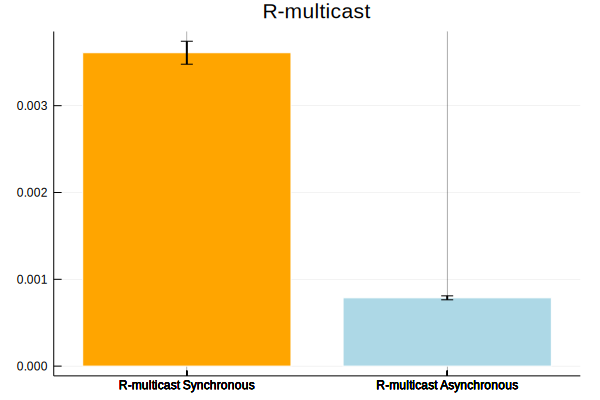

In [42]:
#= 
    Calculate mean and error bar values (for the 
    confidence interval) using fuctions of statistics 
    package
=#
sync_r_mean = mean(sync_r_times)
async_r_mean = mean(async_r_times)
sync_r_err = z*(std(sync_r_times)/sqrt(length(sync_r_times)))
async_r_err = z*std(async_r_times)/sqrt(length(async_r_times))

println("Synchronous ---- mean time: $sync_r_mean && standard deviation: $(std(sync_r_times))")
println("Synchronous ---- iterations times: $sync_r_times\n")
println("Asynchronous ---- mean time: $async_r_mean && standard deviation: $(std(async_r_times))")
println("Asynchronous ---- iterations times: $async_r_times")

#= 
    Builds the bar chart with error bar for 
    r-multicast versions comparision
=#
bar(["R-multicast Synchronous", "R-multicast Asynchronous"], 
    [sync_r_mean, async_r_mean], yerr = [sync_r_err, async_r_err], 
    title = "R-multicast", legend = false, 
    linecolor = "white", markerstrokewidth = 2, 
    markerstrokecolor = "black", color = ["orange", "lightblue"])

* Qual das duas versões (R-multicast síncrono e assíncrono) teve o menor tempo de execução? Por quê?

**Resposta**: _A versão assíncrona teve o menor tempo de execução. Assim como no B-multicast, era o esperado, visto que, mais uma vez, a versão assíncrona faz a exeucução de forma paralela. Vale notar, que como no R-multicast mais mensagens precisam ser enviadas a diferença no tempo de execução entre as duas versões é ainda maior, como pode ser observado melhor no último gráfico do documento._

### Exercício 4: Análise de desempenho: B-multicast vs. R-multicast (3,0 pontos)

Para cada uma das comparações abaixo, qual dos algoritmos teve o menor tempo de execução? Por quê?

* B-multicast assíncrono vs. R-multicast assíncrono.

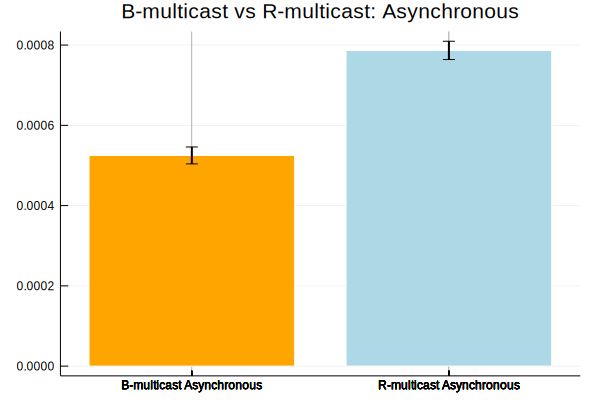

In [43]:
#= 
    Builds the bar chart with error bar for 
    asynchronous algorithms comparision
=#
bar(["B-multicast Asynchronous", "R-multicast Asynchronous"], 
    [async_b_mean, async_r_mean], yerr = [async_b_err, async_r_err], 
    title = "B-multicast vs R-multicast: Asynchronous", legend = false, 
    linecolor = "white", markerstrokewidth = 2, 
    markerstrokecolor = "black", color = ["orange", "lightblue"])

**Resposta**: _O B-multicast assíncrono teve um menor tempo de execução quando comparado ao R-multicast assíncrono. O resultado era o esperado, visto que apesar de ambos utilizarem do processamento em paralelo e sem obrigatoriedade de manutenção da ordem de envio e recebimento das mensagens, o R-multicast envia mais mensagens para garantia de recebimento._    

* B-multicast síncrono vs. R-multicast síncrono.

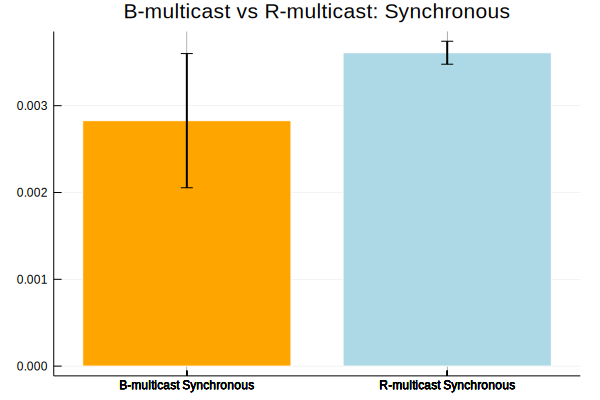

In [44]:
#= 
    Builds the bar chart with error bar for 
    synchronous algorithms comparision
=#
bar(["B-multicast Synchronous", "R-multicast Synchronous"], 
    [sync_b_mean, sync_r_mean], yerr = [sync_b_err, sync_r_err], 
    title = "B-multicast vs R-multicast: Synchronous", legend = false, 
    linecolor = "white", markerstrokewidth = 2, 
    markerstrokecolor = "black", color = ["orange", "lightblue"])

**Resposta**: _Mais uma vez o B-multicast apresenta um menor tempo de execução, e a justificativa é a mesma apresentada acima, o R-multicast precisa enviar mais mensagens para garantia de recebimento, e por isso, é mais lento._

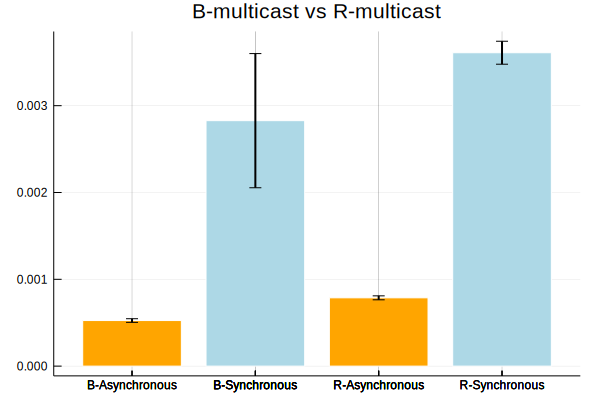

In [45]:
#= 
    Builds the bar chart with error bar for 
    algorithms comparision
=#
bar(["B-Asynchronous", "B-Synchronous", "R-Asynchronous", "R-Synchronous"], 
    [async_b_mean, sync_b_mean, async_r_mean, sync_r_mean], yerr = [async_b_err, sync_b_err, async_r_err, sync_r_err], 
    title = "B-multicast vs R-multicast", legend = false, 
    linecolor = "white", markerstrokewidth = 2, 
    markerstrokecolor = "black", color = ["orange", "lightblue", "orange", "lightblue"])

## Entrega

As respostas deverão ser entregues na parte indicada desse arquivo reservada ao código fonte, no formato [IJulia Notebook](https://github.com/JuliaLang/IJulia.jl), que utiliza tecnologia [Jupyter](https://www.jupyter.org).

O programa deve ser implementado na linguagem de programação [**Julia** versão 1.x](https://julialang.org/downloads/). Seu trabalho será testado na [JuliaBox](https://juliabox.com). 

Baixe seu arquivo `.ipynb` e anexe-o ao Google Classroom. Não se esqueça de **testar seu arquivo `.ipynb` na JuliaBox** antes de enviá-lo.

As respostas deverão ser entregues nos devidos campos desse arquivo, ou seja, em [Markdown](https://en.wikipedia.org/wiki/Markdown) e no formato [IJulia Notebook](https://github.com/JuliaLang/IJulia.jl).

O programa deve ser implementado na linguagem de programação **Julia**. Seu trabalho será testado na [JuliaBox](https://juliabox.com), portanto teste seu arquivo IJulia na JuliaBox antes de enviá-lo.


### Forma 

O arquivo IJulia Notebook deverá ser entregue ao Professor **exclusivamente através do Google Classroom**.



A responsabilidade sobre a integridade do arquivo contendo trabalho é exclusivamente dos discentes. Serão ignorados os trabalhos cujos arquivos não conseguirem ser abertos pelo Professor.

### Prazos

O prazo de entrega sem atraso é o dia **18/11/17**.

Trabalhos entregues com atraso serão aceitos, no máximo, até o o dia **19/11/17**. Serão descontados 5% da nota obtida por dia de atraso.


## Pontuação extra

O(a) discente que realizar mais tarefas, além do que foi especificado neste trabalho, o professor atribuirá de 0,5 a 1,0 ponto extra a depender da relevância da contribuição no programa. O critério será decidido pelo professor. 

O(a) discente deve indicar qual é a tarefa executada. Por exemplo, adição de funcionalidades, armazenamento de dados em arquivo, documentação de código, comentários em inglês sem erros ortográficos, etc.


**Plágio** A nota zero será atribuída caso haja qualquer tipo de cópia parcial ou integral assim como as devidas medidas legais. Leia a [cartilha sobre plágio](http://www.noticias.uff.br/arquivos/cartilha-sobre-plagio-academico.pdf).

## Disclaimer

Esse material foi elaborado pelo [Prof. André Lage Freitas](https://sites.google.com/a/ic.ufal.br/andrelage/) e está licenciado sob a licença _GNU General Public License v3.0_.